In [1]:
import gzip
import numpy as np
import matplotlib.pyplot as plt


Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


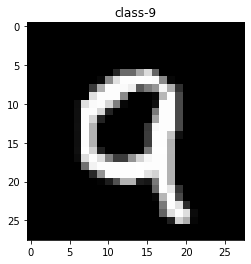

Train image 42228-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38 105 105 167 219  99   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8 139 225 253 253 254 253 250 138
    7   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [2]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/rakeshnemu/Pictures/knn_mnist_data_rakesh_nemu_version_no_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



In [3]:
train_images=train_images.flatten().reshape((train_images.shape[0],train_images.shape[1]*train_images.shape[2])).astype(np.float64)
test_images=test_images.flatten().reshape((test_images.shape[0],test_images.shape[1]*test_images.shape[2])).astype(np.float64)

In [4]:
np.random.seed(42) 
samples = 600
X = []
y= []
for i in range(10):
    indices = np.where(train_labels== i)[0]
    selected_indices = np.random.choice(indices, samples, replace=False)
    X.append(train_images[selected_indices])
    y.extend([i] * samples)
x_selected = np.concatenate(X, axis=0)
y_selected = np.array(y)


In [5]:
n_samples = x_selected.shape[0]
pairwise_distances = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        pairwise_distances[i, j] = np.sqrt(((x_selected[i] - x_selected[j]) ** 2).sum())

dissimilarity1 = -0.5 * (pairwise_distances**2)
def double_centering(matrix):
    n = matrix.shape[0]
    row_means = np.mean(matrix, axis=1, keepdims=True)
    col_means = np.mean(matrix, axis=0, keepdims=True)
    total_mean = np.mean(matrix)
    return -0.5 * (matrix - row_means - col_means + total_mean)

dissimilarity = double_centering(dissimilarity1)
eigenvalues, eigenvectors = np.linalg.eig(dissimilarity)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
n_components = 2
X_mds = np.dot(eigenvectors[:, :n_components], np.sqrt(np.diag(eigenvalues[:n_components])))

/usr/lib/python3/dist-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


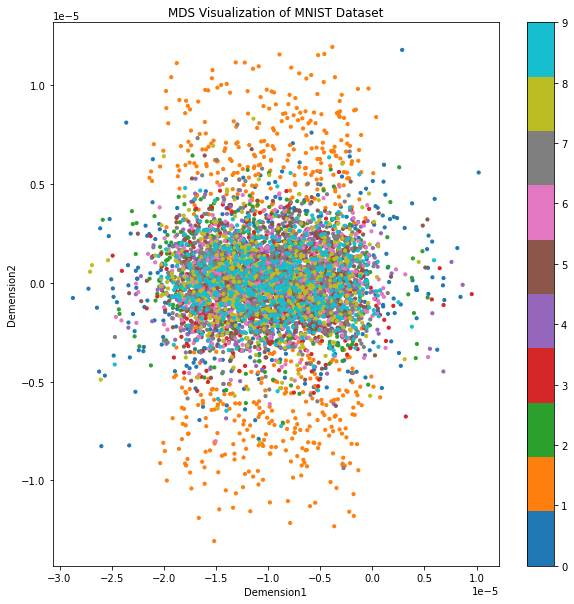

In [14]:
# Plot the results
plt.figure(figsize=(10, 10))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_selected, cmap='tab10',s=10)
plt.colorbar()
plt.xlabel('Demension1')
plt.ylabel('Demension2')
plt.title('MDS Visualization of MNIST Dataset')
plt.show()